In [4]:
from sklearn import svm
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import sys
import os

In [5]:
INPUT = os.getcwd()
INPUT = os.path.join(INPUT, "ROIs")
INPUT

'/home/superuser/Dados/proj/Sara/ROIs'

In [6]:

# system:index,class,evi,gv,lai,ndfia,ndwi,osavi,soil,.geo
allfiles = glob.glob(os.path.join(INPUT, "*.csv"))
df_from_each_file = []

for f in allfiles:    
    print('lindo {}'.format(f))
    ls_names = f.split('/')
    print('"{}",'.format(ls_names[-1][:-4]))
    newdf = pd.read_csv(f)     
    newdf = newdf.drop(['system:index','.geo'], axis=1)

    df_from_each_file.append(newdf)

lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_Pre_2013_Fire.csv
"ptos_Pre_2013_Fire",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_Post_2013_Fire.csv
"ptos_Post_2013_Fire",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_Pre_2002_Fire_vegSeca.csv
"ptos_Pre_2002_Fire_vegSeca",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_Pre_2005_Fire.csv
"ptos_Pre_2005_Fire",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_Post_2002_Fire.csv
"ptos_Post_2002_Fire",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_Post_2005_Fire.csv
"ptos_Post_2005_Fire",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_2002_open_soil.csv
"ptos_2002_open_soil",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_2019_urban.csv
"ptos_2019_urban",
lindo /home/superuser/Dados/proj/Sara/ROIs/ptos_Pre_2002_Fire_vegVed.csv
"ptos_Pre_2002_Fire_vegVed",


In [7]:
concat_df  = pd.concat(df_from_each_file, axis=0, ignore_index=True)
print("temos {} filas ".format(concat_df.shape))

temos (187, 9) filas 


In [8]:
print(concat_df.columns)
concat_df.head(5)

Index(['baiml', 'class', 'dBAIML', 'dMIRBI', 'dNBR', 'dNir', 'mirbi', 'nbr',
       'nir'],
      dtype='object')


,baiml,class,dBAIML,dMIRBI,dNBR,dNir,mirbi,nbr,nir
0,3.119206e-07,0,1.147054e-07,-399.79980,-0.084884,-288,6064.4,0.395329,1643
1,1.013766e-07,0,-2.310039e-08,-124.59961,-0.136323,26,8862.8,0.134939,2498
2,1.536326e-07,0,1.644963e-07,-1749.00050,0.029496,-673,9663.4,0.325561,2274
3,3.705410e-07,0,1.597991e-06,-3493.40000,0.086083,-835,5642.4,0.396296,1508
4,7.432262e-07,0,1.440755e-05,-4101.60000,-0.073448,-866,3612.0,0.519231,1106


In [9]:
concat_df[['class', 'nbr']].groupby('class').count()

,nbr
class,
0,107
1,80


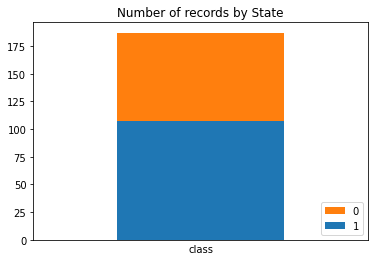

In [10]:
concat_df.assign(dummy = 1).groupby(
  ['dummy','class']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)
plt.title('Number of records by State')
# other it'll show up as 'dummy' 
plt.xlabel('class')

# disable ticks in the x axis
plt.xticks([])
# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = concat_df['class'].unique()

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

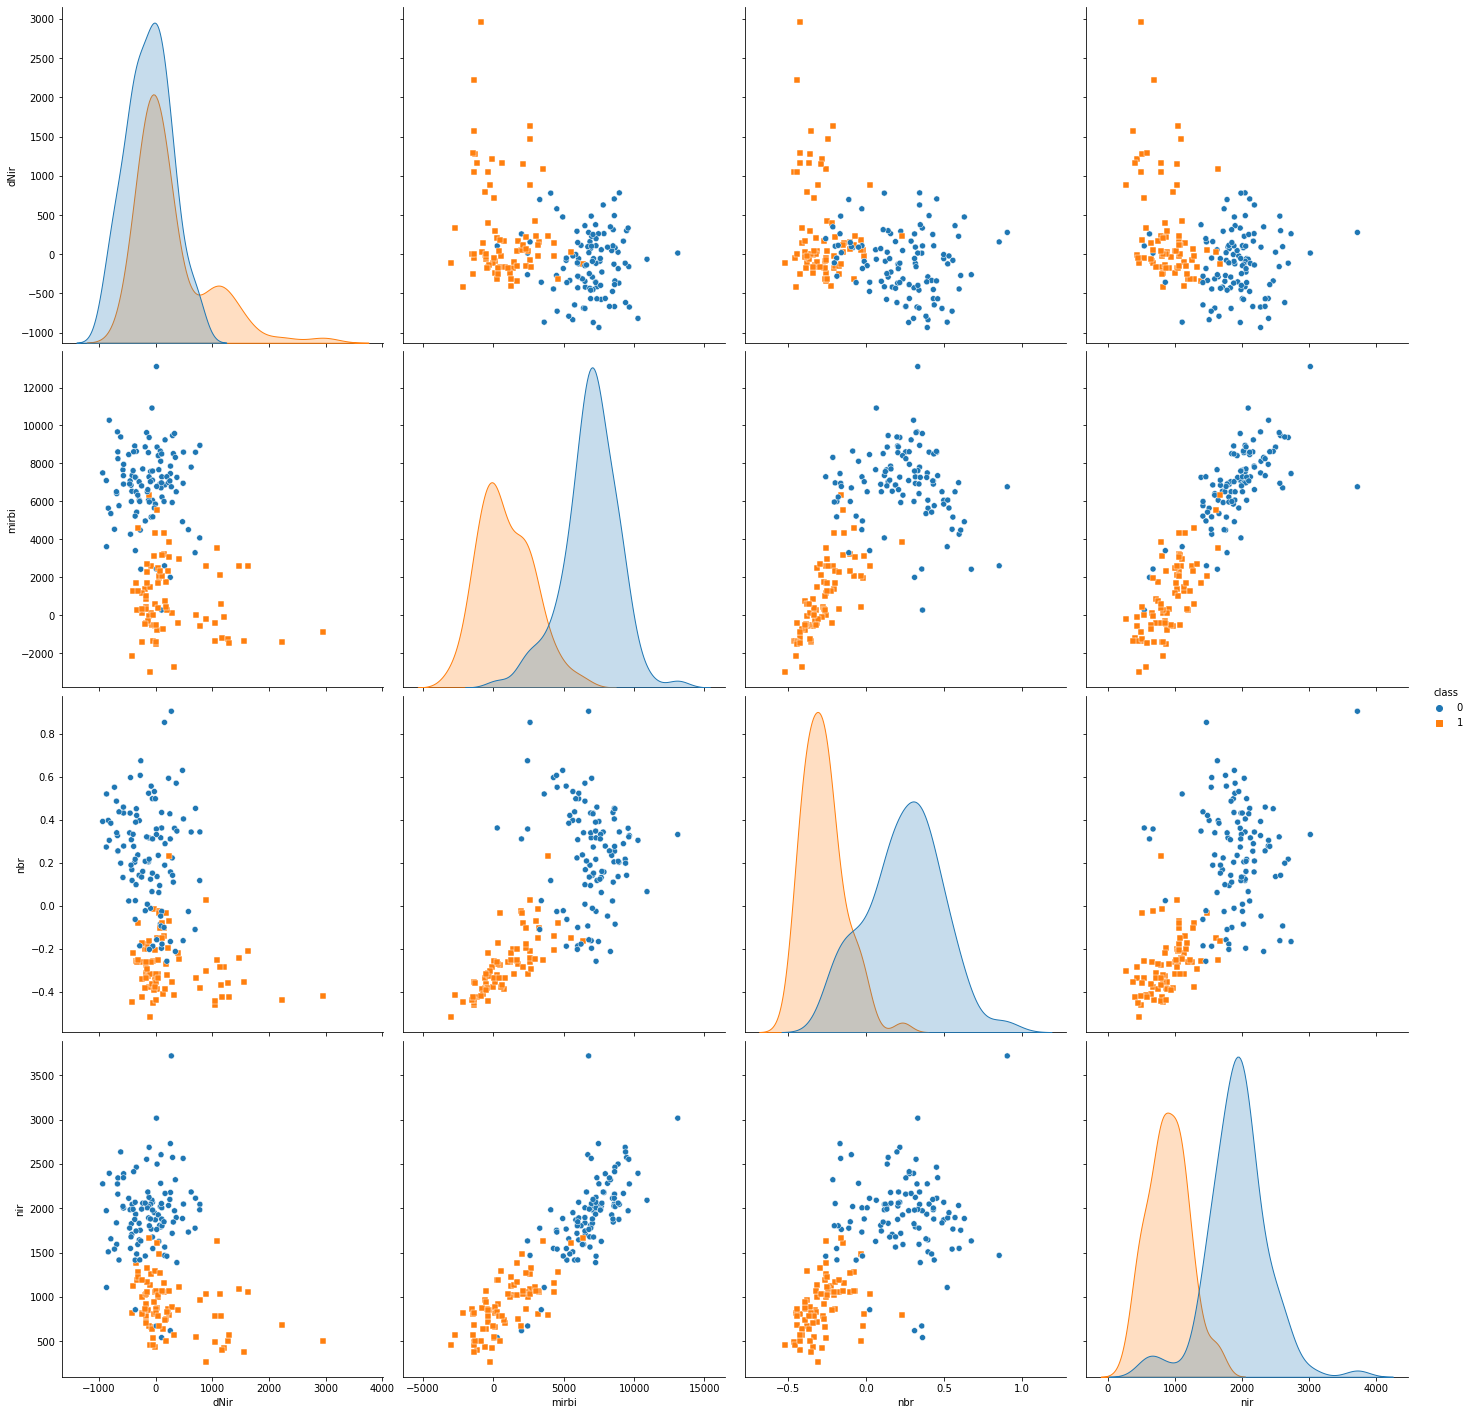

In [9]:
sns.pairplot(vars=['dNir', 'mirbi', 'nbr','nir'], data= concat_df, hue='class', height=5, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  # 

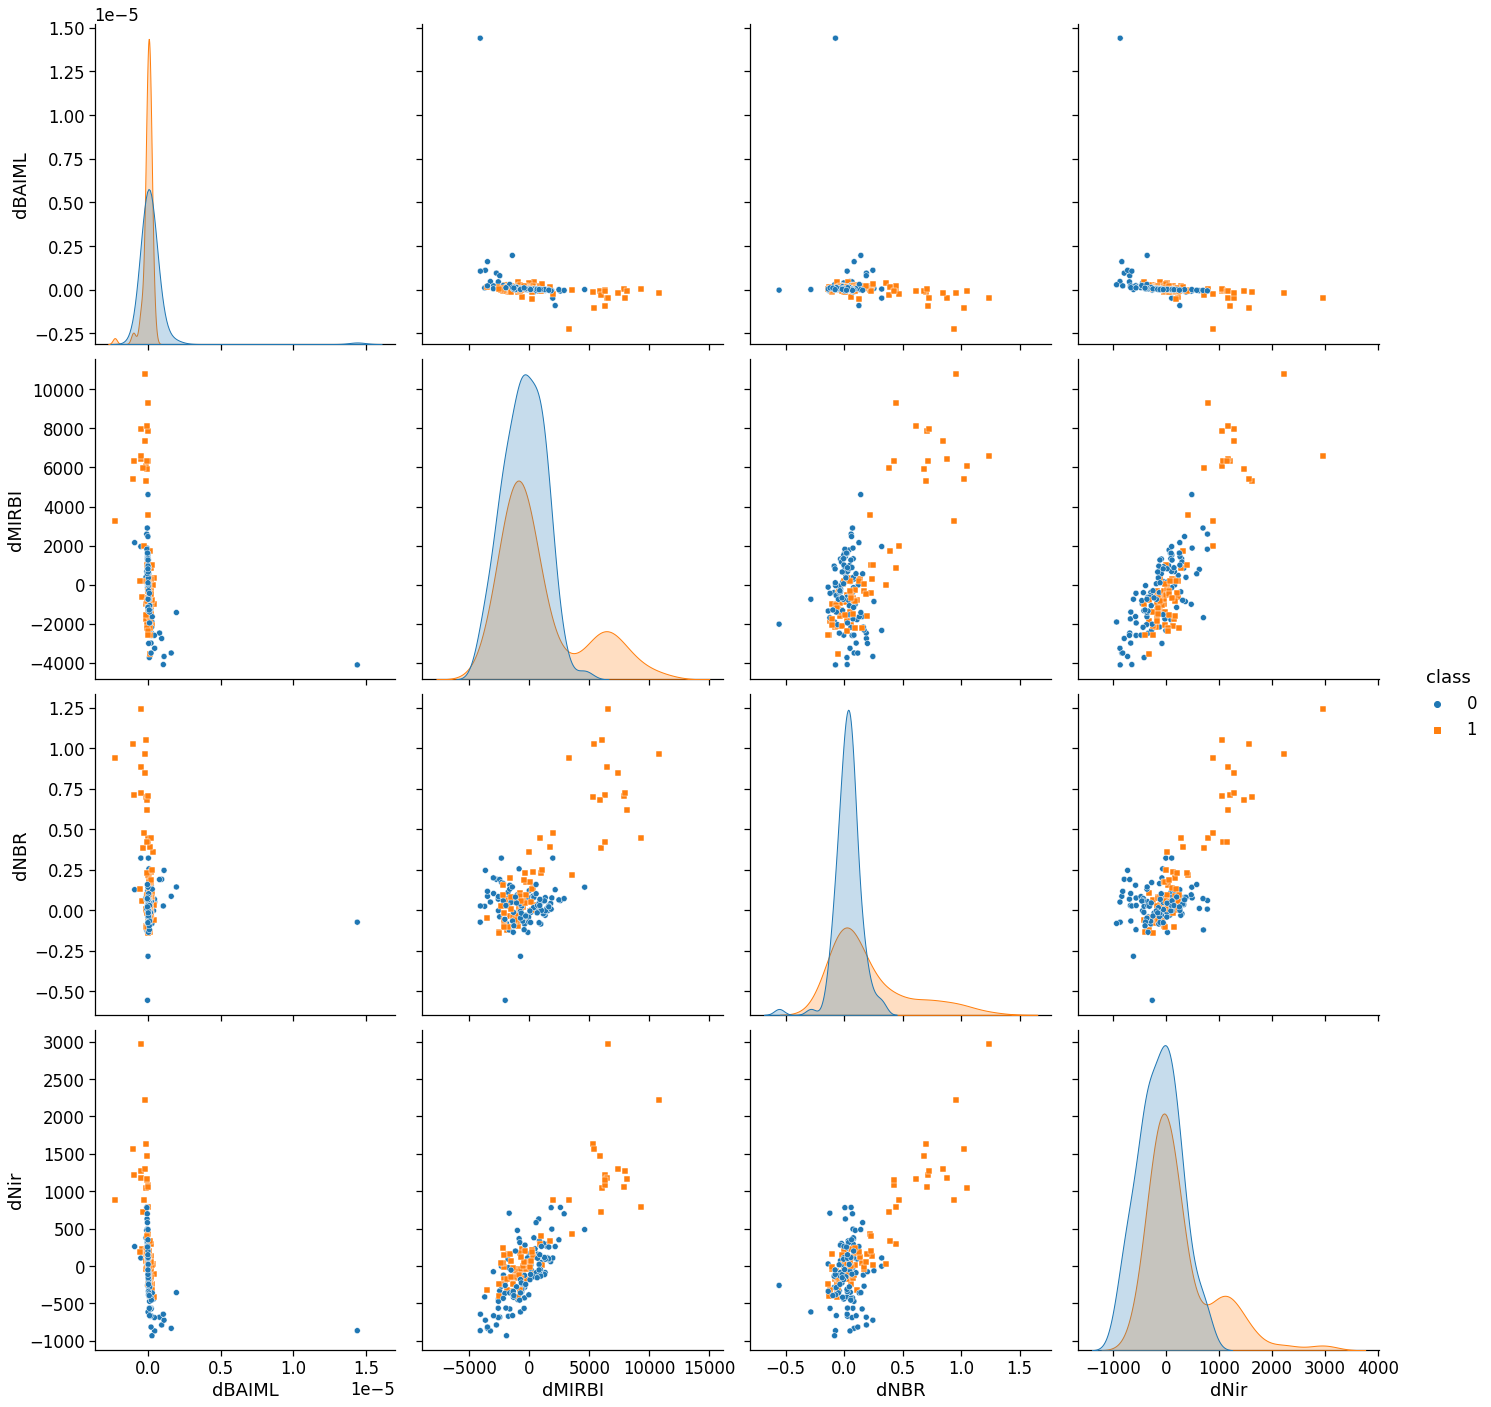

In [10]:
sns.pairplot(vars=['baiml', 'dBAIML', 'dMIRBI', 'dNBR'], data= concat_df, hue='class', height=5, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  # 

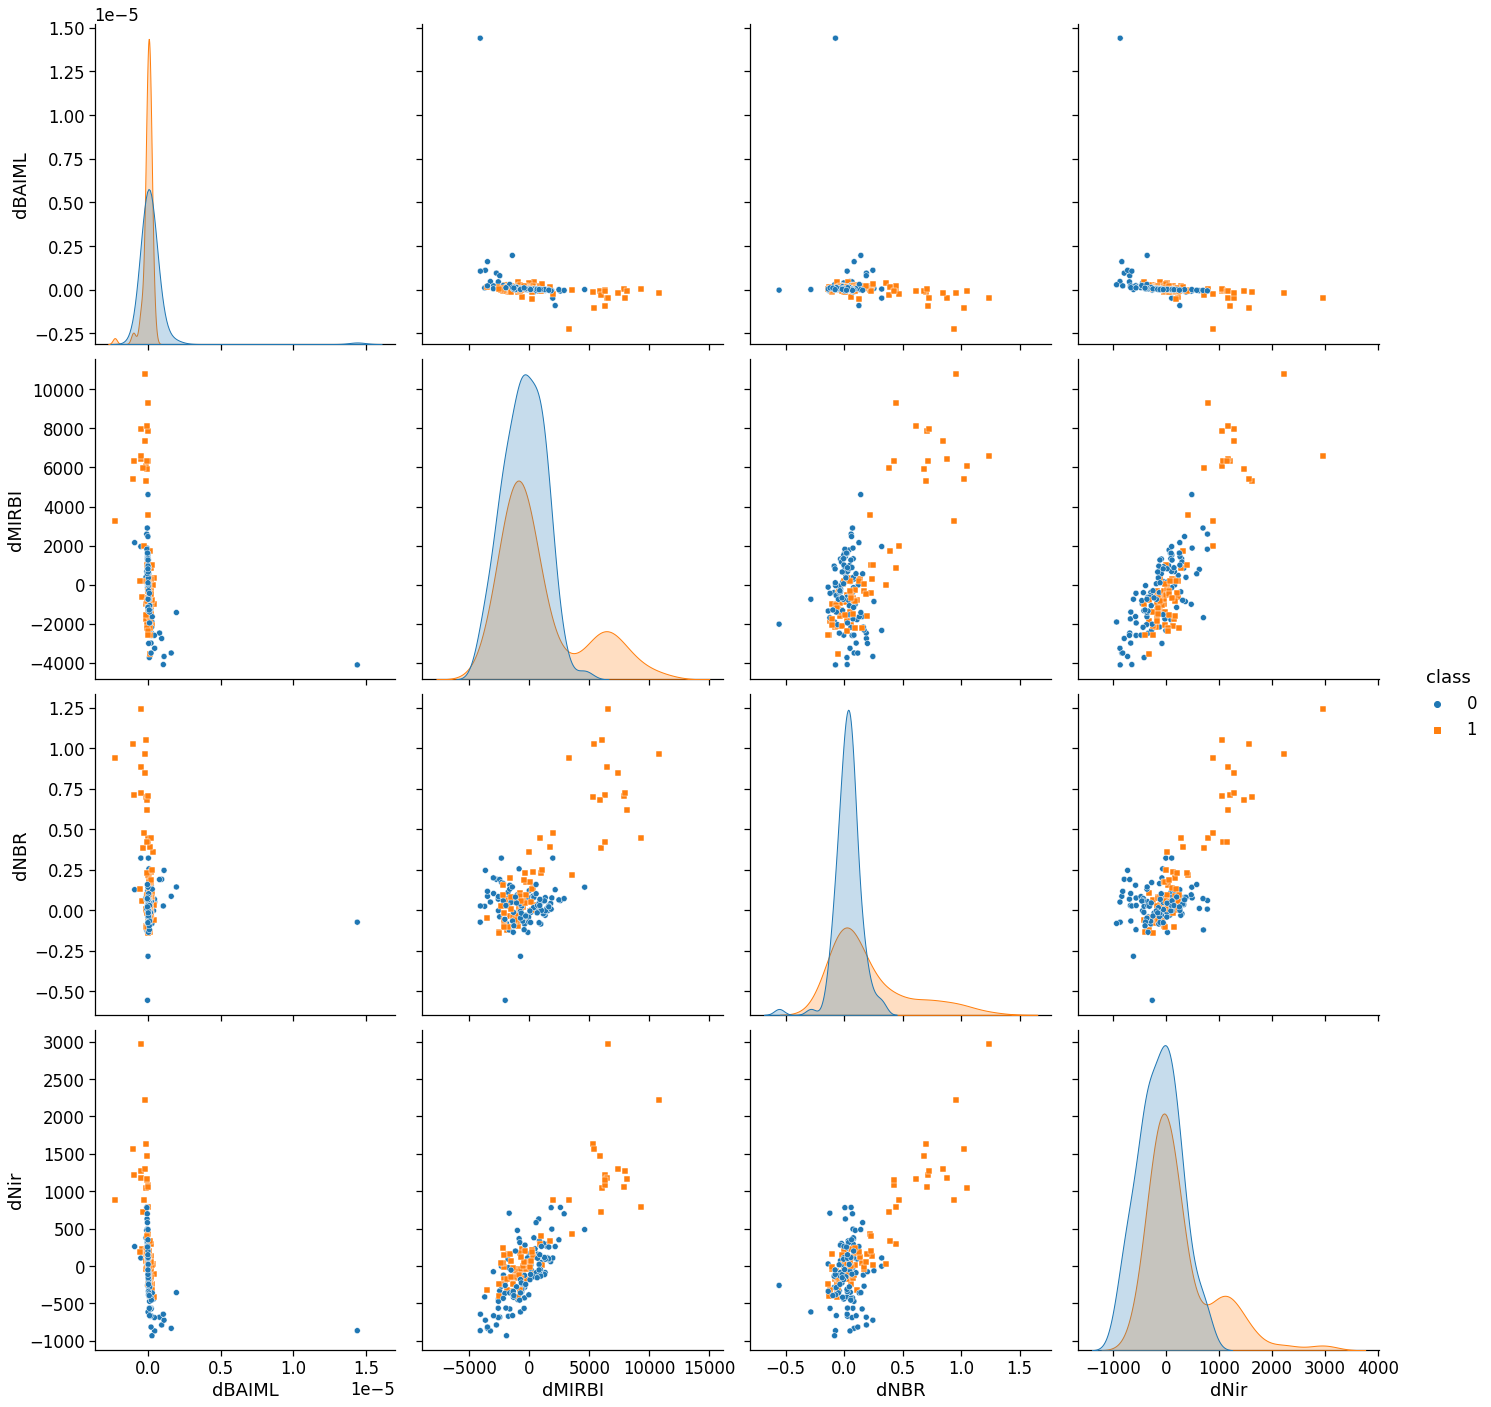

In [11]:
sns.pairplot(vars=['dBAIML', 'dMIRBI', 'dNBR', 'dNir',], data= concat_df, hue='class', height=5, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  # o7p

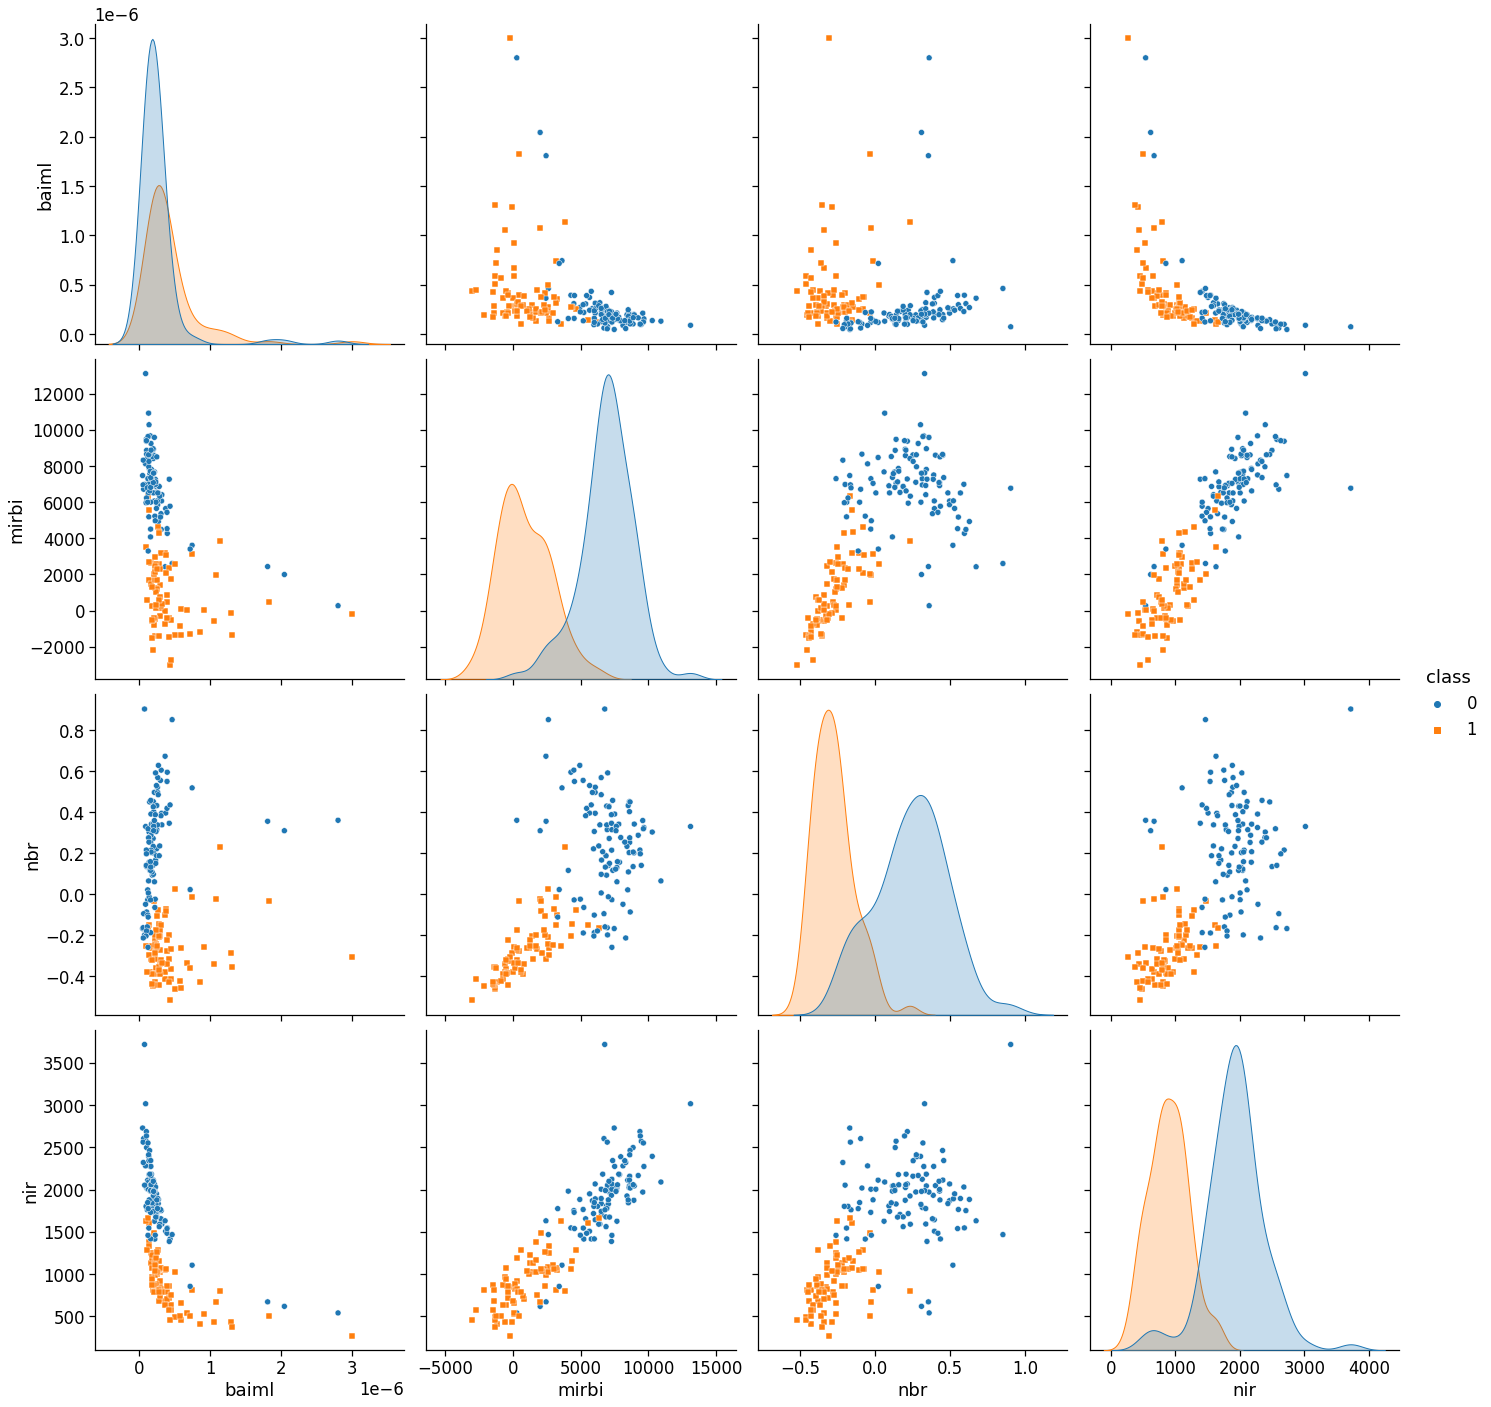

In [12]:
sns.pairplot(vars=['baiml','mirbi', 'nbr','nir'], data= concat_df, hue='class', height=5, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  # 

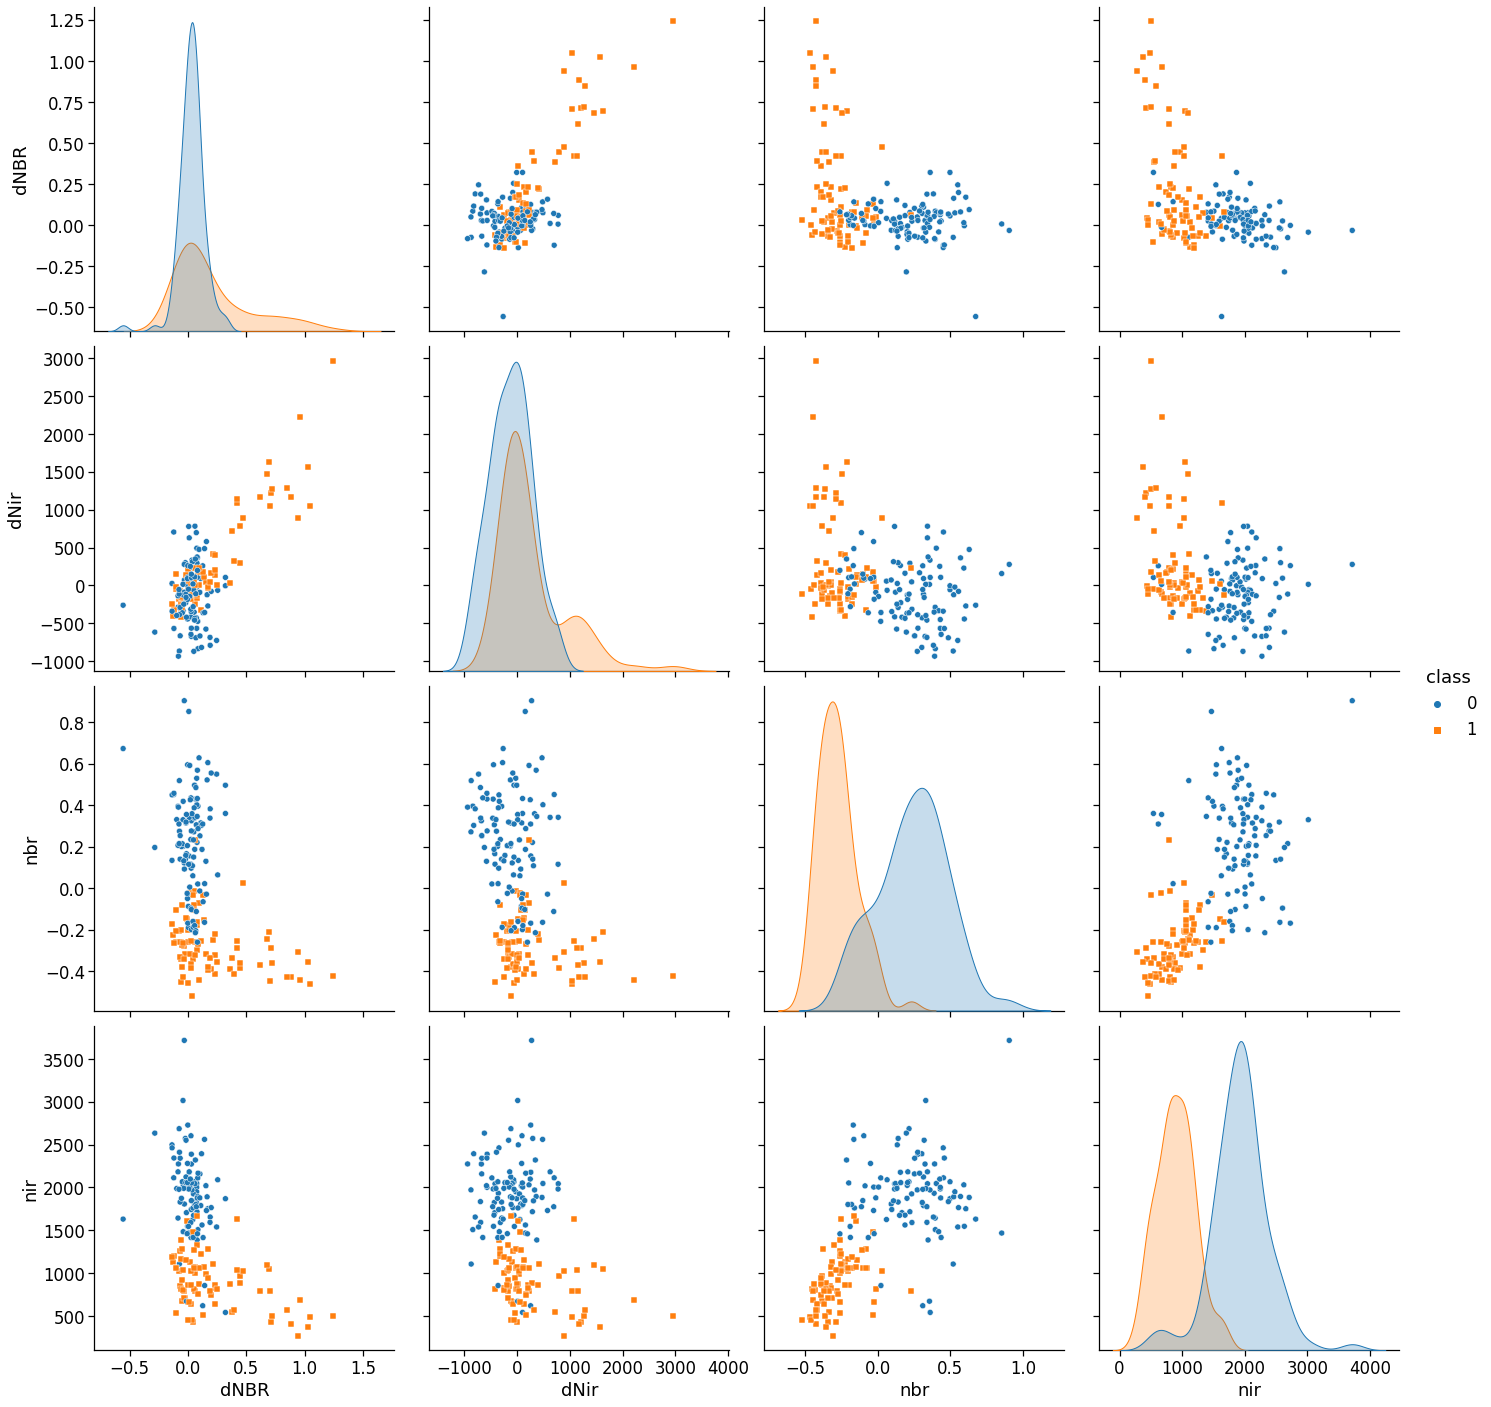

In [13]:
sns.pairplot(vars=['dNBR', 'dNir','nbr','nir'], data= concat_df, hue='class', height=5, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  # 

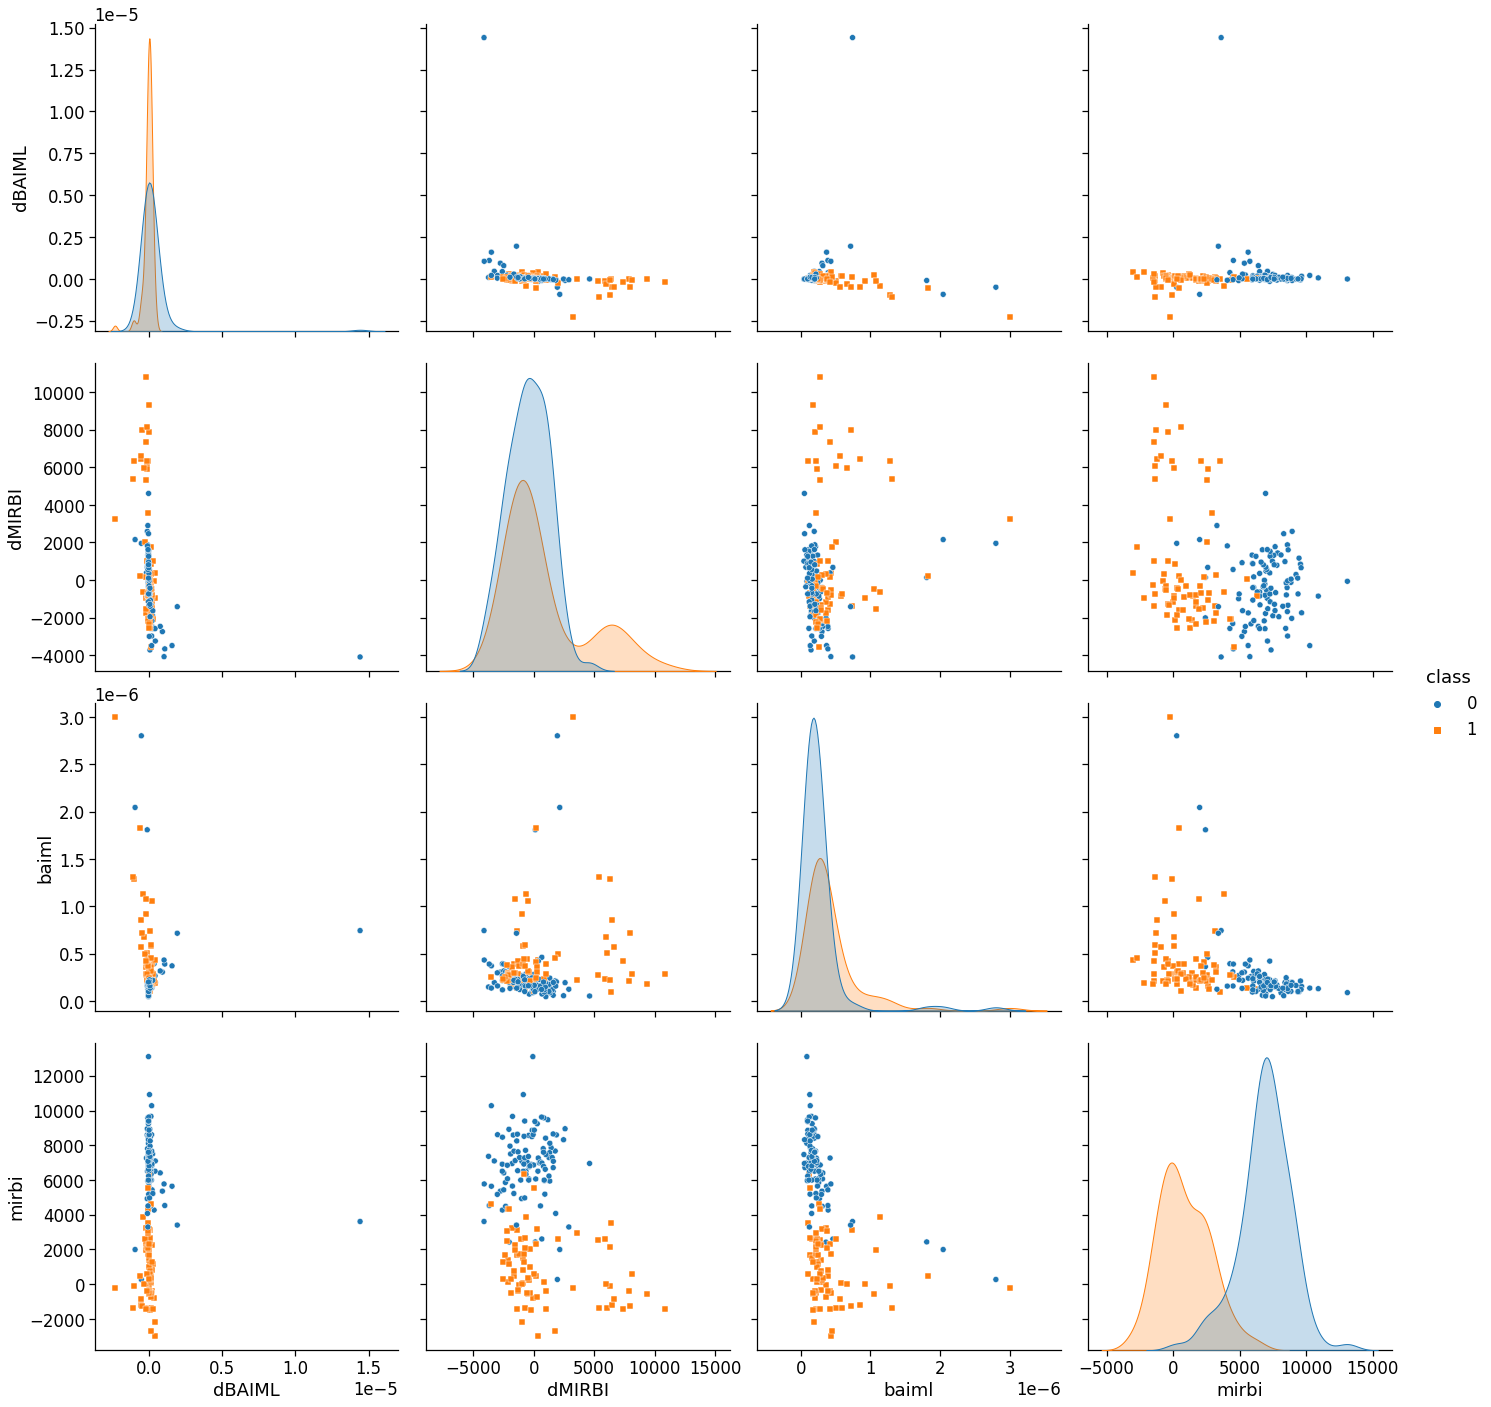

In [14]:
sns.pairplot(vars=['dBAIML', 'dMIRBI','baiml','mirbi'], data= concat_df, hue='class', height=5, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  # 

In [11]:
import sklearn
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
print(__doc__)

Automatically created module for IPython interactive environment


In [12]:
colDif = [x for x in concat_df.columns]
colDif.remove('class')
print(colDif)

['baiml', 'dBAIML', 'dMIRBI', 'dNBR', 'dNir', 'mirbi', 'nbr', 'nir']


In [23]:
columnaTraining = colDif
X_train, X_test, y_train, y_test = train_test_split(concat_df[columnaTraining], concat_df['class'],
                                                   test_size=0.20)
X_train

,baiml,dBAIML,dMIRBI,dNBR,dNir,mirbi,nbr,nir
105,4.208240e-07,-1.439544e-07,377.3999,0.079197,376,7266.6,0.346602,1387
32,1.292928e-07,6.331470e-08,-858.4004,0.255332,-64,10919.0,0.064968,2090
149,1.176964e-07,-1.237177e-08,1525.2002,-0.002450,109,7295.2,-0.026935,2005
109,2.223197e-07,1.692433e-07,-1878.6000,0.026203,-179,-480.4,-0.384286,862
11,1.375941e-07,-2.642853e-08,1440.7998,0.010468,263,7859.8,0.156358,2178
...,...,...,...,...,...,...,...,...
60,8.526613e-07,-4.977157e-07,6456.2000,0.883700,1169,-1177.0,-0.426544,404
28,4.321842e-07,1.054144e-06,-4084.6000,0.026383,-646,5773.2,0.436105,1416
42,2.877278e-07,1.709112e-07,-2112.8000,-0.062656,-245,136.6,-0.340545,823
185,2.021202e-07,8.367699e-08,-1292.8003,-0.095819,-397,7621.6,0.331547,1988


In [24]:
print("tamano do ROI para training", X_train.shape)
print("tamano do ROI para test", X_test.shape)
print("tamano do Salida para training", y_train.shape)
print("tamano do Salida para test", y_test.shape)

tamano do ROI para training (149, 8)
tamano do ROI para test (38, 8)
tamano do Salida para training (149,)
tamano do Salida para test (38,)


In [15]:
type(X_train)

pandas.core.frame.DataFrame

In [17]:
# Combination(8, 5)

In [25]:
columnaTraining = [
'dBAIML', 'dMIRBI', 'dNBR', 'dNir',
'baiml','mirbi', 'nbr','nir'
]

In [26]:
clf = RandomForestClassifier(n_estimators=160, max_depth=5, min_samples_split=10, random_state=0)
clf.fit(X_train[columnaTraining], y_train)
y_pred = clf.predict(X_test[columnaTraining])

In [27]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[20,  0],
       [ 1, 17]])

In [28]:
print(matrix[0,1])
print(matrix[1,0])

0
1


/home/superuser/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


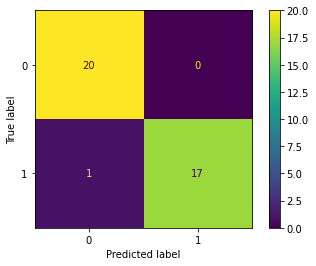

In [29]:
plot_confusion_matrix(clf, X_test[columnaTraining], y_test) 
plt.show()  

In [30]:
#Criando lista de lista com cada lista contendo a lista de features usadas por cada arvore
feats = []
for j in range(len(clf.estimators_)):
  feat = list(set([columnaTraining[i] for i in list(clf.estimators_[j].tree_.feature)]))
  feat.sort()
  feats.append(feat)

In [31]:
print(feat)

['dBAIML', 'dNBR', 'dNir', 'mirbi', 'nbr', 'nir']


In [26]:
#Escrevendo lista em um arquivo csv
import csv

with open("feats_region_1.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(feats)

Text(0.5, 1.0, 'Importância de cada feature')

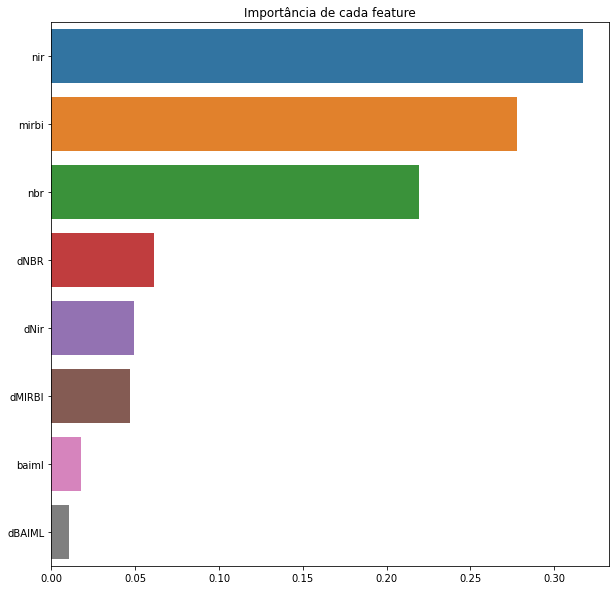

In [32]:
importances = pd.Series(data=clf.feature_importances_, index=columnaTraining)
importances = importances[importances[columnaTraining] > 0].sort_values(ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [41]:
importances.iteritems()

In [33]:
ls_name_imp = []
for name, _imp in importances.iteritems():
    ls_name_imp.append(name)
index_d = 5
for index in range(0, len(ls_name_imp), 5):
    text = ''
    for jj in ls_name_imp[index : index_d]:
        text += '"' + jj + '",'
    print(text)
    index_d += 5 


"nir","mirbi","nbr","dNBR","dNir",
"dMIRBI","baiml","dBAIML",


In [34]:
varlorAcc = accuracy_score(y_test, y_pred)
print("Acurcia geral ====>  {}".format(varlorAcc))

Acurcia geral ====>  0.9736842105263158


In [ ]:
import copy

In [ ]:
# ANOVA SVM-C
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=3)
anova_filter

In [ ]:
fit_KBest = anova_filter.fit(X_train, y_train)
list_ordenda = copy.deepcopy(fit_KBest.scores_)
list_ordenda =sorted(list_ordenda)

In [ ]:
num_feat_sel = 30

In [ ]:
valor_corte = list_ordenda[num_feat_sel]

list_feat_kbest = []
for cc, vv in enumerate(fit_KBest.scores_):
    if vv < valor_corte:
        list_feat_kbest.append(columnaTraining[cc])

print("=== METODO SELECT_KBEST FEATURES =====")
print("lista de todas as features importantes pelo KBest", list_feat_kbest)
print("com {} features".format(len(list_feat_kbest))) 

list_feat_kbest

In [ ]:
y_pred = anova_svm.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
coef = anova_svm[:-1].inverse_transform(anova_svm['linearsvc'].coef_)
print(coef)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [ ]:
h = .02  # step size in the mesh

names = ["Linear SVM", "RBF SVM", "Random Forest", "Neural Net", "Naive Bayes"]

classifiers = [    
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),    
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1500),    
    GaussianNB()
    ]

In [ ]:
for name, clf in zip(names, classifiers):
#     ax = plt.subplot(1, len(classifiers) + 1, i)
    classificado = clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(classificado)
    print(score)

In [ ]:
ax, figure = plt.figure(figsize=(27, 9))
for i in range(10):
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.set_title("Input data")
    ax.scatter(X_train.iloc[:, i], X_train.iloc[:, i + 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test.iloc[:, i], X_test.iloc[:, i + 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

In [ ]:


col = concat_df.columns
importances = pd.Series(data=clfDif.feature_importances_, index=col)
importances = importances[importances[col] > 0].sort_values(ascending = False)
plt.figure(figsize=(10,10))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')